In [ ]:
################## CANH TAY ROBOT BAC 3########

In [ ]:
# Sử dụng các thư viện sau để train mô hình
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing

In [ ]:
# Đọc file dữ liệu đã tạo sẵn và tải lên Drive
data=pd.read_csv("/content/robot3bac.csv")
data.head()

,thelta1,thelta2,thelta3,Px,Py,thelta
0,0.0,0.00,180.0,0.000000,8.576040e-15,180.00
1,0.0,4.00,180.0,0.121797,-3.487824e+00,184.00
2,0.0,0.50,175.0,0.215025,5.666667e+00,175.50
3,0.0,1.25,178.0,0.001238,1.352569e+00,179.25
4,1.0,1.50,90.0,66.919992,7.167838e+01,92.50


In [ ]:
# tạo data x y
data_x=data.drop(['thelta1','thelta2','thelta3','thelta'],axis=1)
print(data_x.shape)
data_y=data[['thelta1','thelta2','thelta3']]
print(data_y.shape)

(500, 2)
(500, 3)


In [ ]:
# 70% trainning, 30% test
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.3)

In [ ]:
# Tạo mô hình
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(2,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 11,411
Trainable params: 11,411
Non-traina

In [ ]:
model.compile(loss='mse',optimizer='adam',metrics='mae')
history= model.fit(x_train, y_train, batch_size=100, epochs=500, verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=40)])

Epoch 1/500
3/3 [==============================] - 1s 113ms/step - loss: 5138.1357 - mae: 37.6302 - val_loss: 4882.1221 - val_mae: 35.6745
Epoch 2/500
3/3 [==============================] - 0s 16ms/step - loss: 5107.7168 - mae: 37.1252 - val_loss: 4870.0571 - val_mae: 35.3457
Epoch 3/500
3/3 [==============================] - 0s 16ms/step - loss: 5098.1265 - mae: 36.8588 - val_loss: 4863.5864 - val_mae: 35.3143
Epoch 4/500
3/3 [==============================] - 0s 15ms/step - loss: 5092.7935 - mae: 36.8160 - val_loss: 4856.4897 - val_mae: 35.3788
Epoch 5/500
3/3 [==============================] - 0s 17ms/step - loss: 5086.7803 - mae: 36.8838 - val_loss: 4849.0176 - val_mae: 35.4696
Epoch 6/500
3/3 [==============================] - 0s 17ms/step - loss: 5082.0005 - mae: 36.9733 - val_loss: 4841.8589 - val_mae: 35.5955
Epoch 7/500
3/3 [==============================] - 0s 15ms/step - loss: 5075.4268 - mae: 37.0461 - val_loss: 4826.3027 - val_mae: 35.5178
Epoch 8/500
3/3 [================

In [ ]:
#Vẽ đồ thị giữa Epochs và Mean absolute error
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss', Score[0])
print('Test mean absolute error', Score[1])

Test Loss 4.677491664886475
Test mean absolute error 0.8708066940307617


<function matplotlib.pyplot.show>

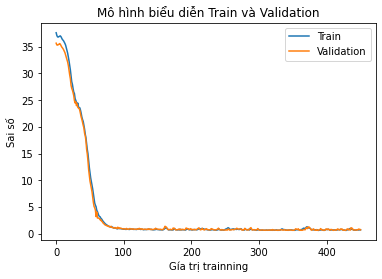

In [ ]:
# predict
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mô hình biểu diễn Train và Validation')
plt.ylabel('Sai số')
plt.xlabel('Gía trị trainning')
plt.legend(['Train','Validation'])
plt.show
plt.show